In [8]:
#%run -i '../../scripts/utility_readblt.py' 'mu4j'

In [17]:
from utility_common import *
from utility_plotter import *
import ROOT
from IPython.display import clear_output
## add plotting option and load plotting parameter table
%matplotlib inline
#%qtconsole --style monokai
plt.style.use('classic')
plt.rc("figure",facecolor="w",figsize=(6,4))
plt.rc("font",size=10)
plt.rc("savefig",dpi=300)

# 1. Read data and MC as dataframe

In [30]:
selection  = "mu4j"
nbjetcut   =  ">=1"

pickledir  =  "/home/zchen/Documents/Analysis/workplace/data/pickle/{}/".format(selection)

cuts = GetSelectionCut(selection) + "& (nBJets{})".format(nbjetcut)

Data = LoadDataframe(pickledir + "data2016").query(cuts)
Fake = LoadDataframe(pickledir + "data2016_inverseISO").query("nBJets{}".format(nbjetcut))
MCzz = LoadDataframe(pickledir + "mcdiboson").query(cuts)
MCdy = LoadDataframe(pickledir + "mcdy").query(cuts)
MCt  = LoadDataframe(pickledir + "mct").query(cuts)
MCtt = LoadDataframe(pickledir + "mctt").query(cuts)

In [31]:
# signal mc is tt+tW
MCsg = pd.concat([MCt,MCtt],ignore_index=True)

MCsgf = MCsg.query('genCategory in [16,18,19,20,21] ') # semilep and had
MCsg0 = MCsg.query('genCategory in [1,2,3,4,5,6,7,8,9,10,11,12]') #other lep
MCsg1 = MCsg.query('genCategory in [17]') #mu+j
MCsg2 = MCsg.query('genCategory in [13,14,15]') #mutau

df_list = [Fake,MCzz,MCdy,MCsgf,MCsg0,MCsg1,MCsg2,Data]

# 2. Plot kinematics

In [32]:
pp = pd.read_csv("plotparameters4j.csv")

label_list = ['Fakes','Diboson','V+Jets',
              r'$tt/tW \rightarrow lh$ other',
              r'$tt/tW \rightarrow ll$ other',
              r'$tt/tW \rightarrow \mu + h$',
              r'$tt/tW \rightarrow \mu+ \tau$',
              'data']
color_list = ["gray","#a32020", "#e0301e", "#eb8c00", "#49feec", "deepskyblue", "mediumpurple", "k"]
plotoutdir = GetPlotDir(selection, nbjetcut)
print(plotoutdir)

/home/zchen/Documents/Analysis/workplace/plot/mu4j/combined/


In [33]:
for index, row in pp.iterrows():
    v,a,b,step,xl = row["var"],row["lower"],row["upper"],row["step"],row["xlabel"]
    #if v[:4] in ["jet1","jet2","jet3","jet4"]:
    #    continue
    plotter = SelectionPlotter(v,a,b,step,df_list,adjust=[0.06,1,1,1,1,1,1])
    plotter.settingPlot(xl,label_list,color_list)
    plotter.makePlot(plotoutdir)
    
    # print out process
    print("making plots: {0}/{1}".format(index,len(pp)))
    clear_output(wait=True)
    plt.close()
print('finish all making plots')

finish all making plots


/home/zchen/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


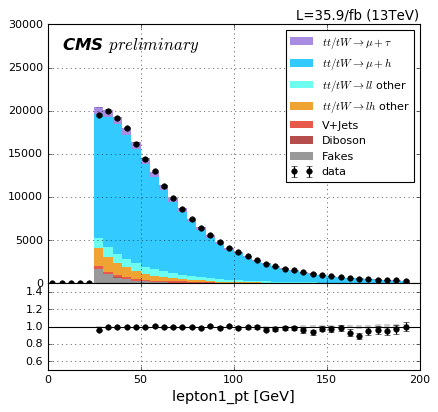

In [21]:
v,a,b,step,xl = "lepton1_pt",0,200,5,"lepton1_pt [GeV]"
plotter = SelectionPlotter(v,a,b,step,df_list,adjust=[0.06,1,1,1,1,1,1])
plotter.settingPlot(xl,label_list,color_list)
plotter.makePlot()
#plt.savefig("../../plot/mu4j/lepton1_pt_2b.png",dpi=200)

# 3. Counting

In [16]:
ctr = SelectionCounter()

In [20]:
print("(nBJets{})".format(nbjetcut))

print("MCtt: {}".format(ctr.countSlt_ByTauDecay(MCtt,withweights=False)) )
print("MCtt width: {}".format(ctr.countSlt_ByTauDecay(MCtt,withweights=True)) )

print("MCt : {}".format(ctr.countSlt_ByTauDecay(MCt, withweights=False)) )
print("MCt width: {}".format(ctr.countSlt_ByTauDecay(MCt, withweights=True)) )

(nBJets>1)
MCtt: [0, 16993, 38436, 0, 293, 468, 0, 2501, 2, 0, 2464, 3, 7282, 5669, 36703, 59, 883978, 11, 57738, 65, 484]
MCtt width: [0, 16224.721497326427, 36444.03010750094, 0, 275.523988656234, 434.42298366269097, 0, 2344.250463366625, 2.1510307788848877, 0, 2319.409143350582, 2.883317708969116, 6886.124544229868, 5384.951324461785, 34925.8639038369, 55.627302701584995, 848610.9902803262, 10.344973489642143, 54726.41036749651, 63.04564672708511, 466.79517862503417]
MCt : [0, 47, 106, 0, 0, 2, 0, 7, 0, 0, 4, 0, 15, 20, 119, 0, 3281, 0, 238, 1, 1]
MCt width: [0, 46.40700948983431, 103.80071824416518, 0, 0, 2.1778682470321655, 0, 7.473242819309235, 0, 0, 3.5339628159999847, 0, 13.16394792124629, 20.798925131559372, 116.39976267144084, 0, 3187.1593322869157, 0, 230.56014205585234, 1.0938928127288818, 0.8616005778312684]


In [21]:
ctr.countSlt_Scaled(df_list)

data:204747.0
TotalMC:202104.37578471412
------ MC break down ------
[4.33628742e+01 3.20077733e+03 1.09375291e+04 1.13717339e+04
 1.67282216e+05 9.26875645e+03]


In [5]:
for thisdf in [ MCzz, MCdy, MCt, MCtt, Data]:
    n = np.sum(thisdf.eventWeight)
    nerr = np.sum(thisdf.eventWeight**2)**0.5
    print('{:.2f},{:.2f}'.format(n,nerr))

43.36,3.57
3205.46,78.49
4848.86,80.78
194011.38,195.21
204747.00,452.49


In [36]:
    n = np.sum(Fake.eventWeight*0.0055)
    nerr = np.sum((Fake.eventWeight*0.0055)**2)**0.5
    print('{:.2f},{:.2f}'.format(n,nerr))

2628.25,3.80


In [26]:
# print Generator information
f = ROOT.TFile("../../data/root/2016MC.root")
print("MCtt : {}".format(ctr.countGen_ByTauDecay(f,'ttbar_inclusive')) )
temp = np.array(ctr.countGen_ByTauDecay(f,'t_tw'))
temp+= np.array(ctr.countGen_ByTauDecay(f,'tbar_tw'))
print("MCt  : {}".format(list(temp)) )

MCtt : [1811409.0, 1811532.0, 3620281.0, 57057.0, 54227.0, 111125.0, 418126.0, 418126.0, 763147.0, 642646.0, 626108.0, 2350887.0, 643368.0, 627277.0, 2353727.0, 22670017.0, 22653517.0, 4016590.0, 3923504.0, 14718933.0, 70930278.0]
MCt  : [23105.0, 23040.0, 46342.0, 694.0, 717.0, 1420.0, 5260.0, 5260.0, 9727.0, 8199.0, 8029.0, 30054.0, 8163.0, 8006.0, 29970.0, 290101.0, 289467.0, 50864.0, 50050.0, 187515.0, 904067.0]
